In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import calendar
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [13]:
# Define the filename
FILENAME = r"C:\Users\dines\OneDrive\Desktop\shopping\shopping\shopping.csv"  # Update this with the correct path if necessary


In [14]:
# Function to load data
def load_data(filename):
    months = {name: idx for idx, name in enumerate(calendar.month_abbr)}  # Month name to index mapping
    
    evidence = []
    labels = []

    # Reading the CSV data into a pandas DataFrame
    df = pd.read_csv(filename)
    
    print("First few rows of the dataset:\n", df.head())  # Print first few rows for inspection
    
    for _, row in df.iterrows():
        evidence.append([
            row["Administrative"],
            row["Administrative_Duration"],
            row["Informational"],
            row["Informational_Duration"],
            row["ProductRelated"],
            row["ProductRelated_Duration"],
            row["BounceRates"],
            row["ExitRates"],
            row["PageValues"],
            row["SpecialDay"],
            months[row["Month"][:3].capitalize()],  # Convert month name to index
            row["OperatingSystems"],
            row["Browser"],
            row["Region"],
            row["TrafficType"],
            1 if row["VisitorType"] == "Returning_Visitor" else 0,
            1 if row["Weekend"] == "TRUE" else 0
        ])
        # Revenue is the target variable
        labels.append(1 if row["Revenue"] == "TRUE" else 0)

    # Print the first few rows of evidence and labels
    print(f"First few rows of evidence:\n {evidence[:5]}")
    print(f"First few rows of labels:\n {labels[:5]}")

    return np.array(evidence), np.array(labels)

In [20]:
# Function to train the k-NN model
def train_model(evidence, labels):
    model = KNeighborsClassifier(n_neighbors=1)
    model.fit(evidence, labels)
    
    print("Model trained with the following parameters:")
    print(f"Number of neighbors: {model.n_neighbors}")
    
    return model


In [21]:
# Function to calculate sensitivity and specificity
def evaluate(labels, predictions):
    true_positive = np.sum((labels == 1) & (predictions == 1))
    false_negative = np.sum((labels == 1) & (predictions == 0))
    true_negative = np.sum((labels == 0) & (predictions == 0))
    false_positive = np.sum((labels == 0) & (predictions == 1))

    print(f"Confusion matrix components: TP={true_positive}, FN={false_negative}, TN={true_negative}, FP={false_positive}")
    
    sensitivity = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0
    specificity = true_negative / (true_negative + false_positive) if (true_negative + false_positive) > 0 else 0

    return sensitivity, specificity

In [22]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_test, predictions):
    cm = confusion_matrix(y_test, predictions, labels=[0, 1])
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Purchase", "Purchase"], yticklabels=["No Purchase", "Purchase"])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()


In [23]:
# Main function to run the model
def main():
    # Load data
    evidence, labels = load_data(FILENAME)
    
    # Split data into training and testing sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(evidence, labels, test_size=0.4, random_state=42)
    
    # Train the model
    model = train_model(X_train, y_train)
    
    # Make predictions on the test set
    predictions = model.predict(X_test)
    
    # Evaluate the model
    sensitivity, specificity = evaluate(y_test, predictions)
    
    print(f"True Positive Rate (Sensitivity): {100 * sensitivity:.2f}%")
    print(f"True Negative Rate (Specificity): {100 * specificity:.2f}%")
    
    # Plot confusion matrix
    plot_confusion_matrix(y_test, predictions)

First few rows of the dataset:
    Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10 

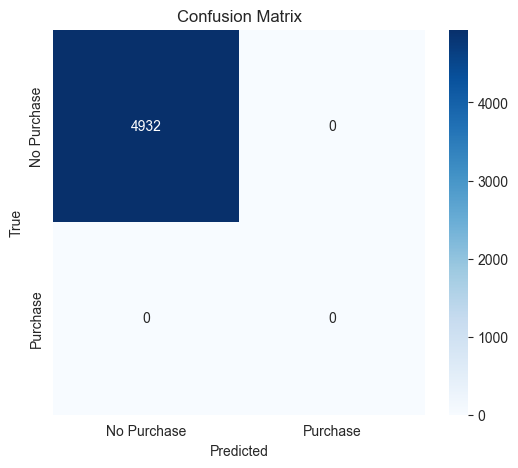

First few rows of the dataset:
    Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10 

In [24]:
# Function to test the code
def test_shopping():
    """Test if load_data, train_model, and evaluate functions work correctly."""
    try:
        evidence, labels = load_data(FILENAME)
        print("load_data: Passed")
    except Exception as e:
        print(f"load_data: Failed - {e}")
    
    try:
        model = train_model(evidence, labels)
        print("train_model: Passed")
    except Exception as e:
        print(f"train_model: Failed - {e}")
    
    try:
        predictions = model.predict(evidence)
        sensitivity, specificity = evaluate(labels, predictions)
        print("evaluate: Passed")
        print(f"Evaluation - Sensitivity: {100 * sensitivity:.2f}%, Specificity: {100 * specificity:.2f}%")
    except Exception as e:
        print(f"evaluate: Failed - {e}")

# Run the main function to execute the model
main()

# Optionally, test the model components
test_shopping()